In [1]:
from git import Repo
import matplotlib.pyplot as plt
import seaborn
import axelrod
import os
import subprocess
import time
import csv
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
len(axelrod.strategies)

118

In [3]:
path_to_repo = "../../../src/Axelrod/"
repo = Repo(path_to_repo)

In [4]:
all_commits = [c for c in repo.iter_commits()]

In [5]:
len(all_commits)

2038

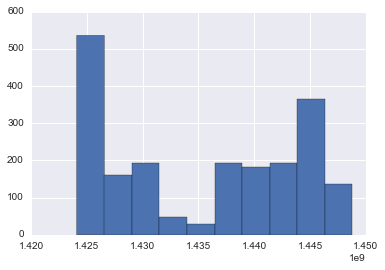

In [6]:
plt.hist([c.committed_date for c in all_commits]);

In [7]:
git = repo.git

In [9]:
number_of_strategies = []
dates = []
git.checkout('master')

try:
    os.remove('data') 
except OSError:    
    pass
    
for c in sorted(all_commits, key=lambda x:x.committed_date):
    
    for rubbish in [".DS_Store", 
                    "axelrod/.DS_Store", 
                    "axelrod/tests/.DS_Store",
                    "axelrod/strategies/.DS_Store"]:  # Having to delete some files that were not in gitignore at the time of the commit
        try:
            os.remove(path_to_repo + rubbish)
        except OSError:
            pass
        
    git.checkout(c)
    time.sleep(1) # Needed to let files write
    
    try:
        f = open('data', "a")
        subprocess.call(['python2', 'number_of_strategies.py', str(c.committed_date), c.hexsha], stdout=f)
        f.close()
        dates.append(c.committed_date)

    except ImportError:
        pass

git.checkout('master')

"Your branch is up-to-date with 'origin/master'."

In [94]:
f = open('data', 'r')
csvrdr = csv.reader(f, delimiter=' ')
data = [row for row in csvrdr]
f.close()

In [106]:
import time
import datetime
times = [time.strptime(time.asctime(time.gmtime(float(row[0])))) for row in data]
type(times[0])

time.struct_time

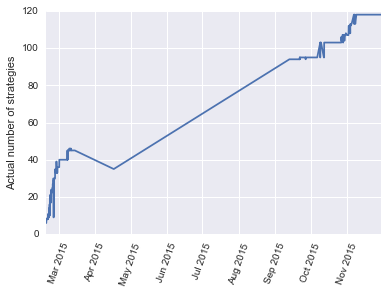

In [109]:
import matplotlib
plt.figure()
dates = [datetime.datetime.fromtimestamp(time.mktime(t)) for t in times]
plt.plot(dates, [int(c[1]) for c in data])
plt.xticks(rotation=70)
plt.ylabel('Actual number of strategies');

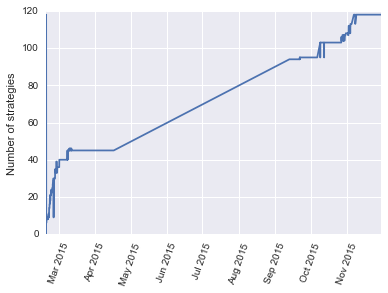

In [111]:
import matplotlib
plt.figure()
dates = [datetime.datetime.fromtimestamp(time.mktime(t)) for t in times]
nbrs = [int(c[1]) for c in data]
maximum = [0] + [max(n, nbrs[i - 1]) for i, n in enumerate(nbrs[1:])]
plt.plot(dates, maximum)
plt.xticks(rotation=70)
plt.ylabel('Number of strategies');

In [8]:
import time

NameError: name 'axelrod' is not defined

In [9]:
len(axelrod.strategies)

NameError: name 'axelrod' is not defined

In [32]:
git.checkout(all_commits[-100])

''

In [2]:
import axelrod

IndentationError: expected an indented block (inverse.py, line 13)

In [12]:
axelrod.tournament??